# Debug Data

In [1]:

import sys
sys.path.append('..')

import assignment3
# import importlib
# importlib.reload(assignment3.evaluator)

from assignment3.iteration import EMProcess
from assignment3.evaluator import Evaluator
from assignment3.utils import *
from assignment3.build_matrices import *
from assignment3.em import *
import matplotlib.pyplot as plt

In [2]:
train_files = ['../data/hw3-debug-train.fasta']
test_files = ['../data/hw3-debug-test.fasta']
train_sequences = get_seqs_from_files(train_files)
test_sequences = get_seqs_from_files(test_files)
k = 10
background = [0.25]*4
pseudo_counts = get_pseudo_count_vector()
print('pseudo_counts = ', pseudo_counts)

pseudo_counts =  [0.0625, 0.0625, 0.0625, 0.0625]


# EM

In [3]:
def get_entropies(processes):
    entropies = np.array([p.wmm.entropy for p in processes])
    return entropies

In [4]:
seeds = get_seed_kmers(train_sequences[0] ,k)

processes = []
all_entropies = {}
for seed in seeds:
    process = EMProcess(train_sequences, k , background)
    processes.append(process)
    process.initialize(seed,pseudo_counts)
entropies = np.array([p.wmm.entropy for p in processes])
entropies

array([11.5241532, 11.5241532, 11.5241532, 11.5241532, 11.5241532,
       11.5241532, 11.5241532, 11.5241532, 11.5241532, 11.5241532,
       11.5241532, 11.5241532, 11.5241532, 11.5241532, 11.5241532,
       11.5241532, 11.5241532, 11.5241532, 11.5241532, 11.5241532,
       11.5241532])

In [5]:

for i in range(3):
    for process in processes:
        process.iterate()
    all_entropies[i+1] = get_entropies(processes)


..\assignment3\em.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  E_zij = np.array(E_zij)


### ABC

For each of the S seed WMMs defined in "Initialization," do three E-step/M-step pairs. Among the resulting S WMMs, select three WMMs: the ones attaining the highest entropy (relative to background), the median entropy, and the lowest entropy. Call these WMMs A, B and C, respectively.



In [6]:
entropies = np.array([p.wmm.entropy for p in processes])


highest, median, lowest = np.argmax(entropies), np.argsort(entropies)[len(entropies)//2], np.argmin(entropies)
print('highest, median, lowest = ',highest, median, lowest)
print(entropies)

highest, median, lowest =  13 9 5
[6.0366864  6.00591546 7.59633757 6.28944926 4.96636378 4.66229794
 5.09199165 7.14874519 6.18835734 6.42046329 8.73607523 6.60085077
 6.30143969 9.00193825 7.4476673  8.26240343 5.33959764 6.75215258
 7.63083862 5.90435029 7.34306738]


In [7]:
import copy
A, B, C = processes[highest].wmm, processes[median].wmm, processes[lowest].wmm
A,B,C = copy.deepcopy(A),copy.deepcopy(B),copy.deepcopy(C)


### Additional 7 rounds 

In [8]:
for i in range(7):
    for process in processes:
        process.iterate()
    all_entropies[i+1+3] = get_entropies(processes)

### D
Run an additional 7 E-step/M-step pairs on all S of the third-round WMMs (a total of 10 E-M rounds on each). Select as your final "motif" the best (highest entropy) of the S candidates after round 10; call this WMM D.

In [9]:
entropies_7 = np.array([p.wmm.entropy for p in processes])
print(entropies_7)
D = processes[np.argmax(entropies_7)].wmm
print(D.entropy)

[6.27061704 7.19658653 8.14501818 8.2538409  7.41105493 6.29834505
 6.43548827 7.27970632 7.98058162 6.62747426 8.79883975 7.22871599
 7.13318311 8.99686437 7.56541872 8.58213869 7.64716291 7.75489931
 8.88358957 7.20347066 7.70935027]
8.996864370083042


### Entropy table 
As a simple descriptive summary of this process, print in a tidy-ish S row by 11 column table the entropies of each seed WMM and its 10 successive E-M-refined iterates.

In [10]:
import pandas as pd
table = pd.DataFrame(all_entropies)
table['seed'] = seeds 
table = table[['seed'] + table.columns.tolist()[:-1]]
table.style.set_caption("Entropy : rows = seed numbers, columns = EM iterations")
print("Entropy : rows = seed numbers, columns = EM iterations")
table

Entropy : rows = seed numbers, columns = EM iterations


,seed,1,2,3,4,5,6,7,8,9,10
0,ATTTTTATTC,5.203701,5.676604,6.036686,6.165846,6.217892,6.243589,6.256882,6.263914,6.267940,6.270617
1,TATTCATCAA,4.849058,5.410272,6.005915,6.438454,6.816174,7.069016,7.168652,7.191362,7.195743,7.196587
2,ATCAAGTGTT,5.441284,6.895772,7.596338,7.733638,7.755860,7.763748,7.772296,7.780438,7.830060,8.145018
3,GTGTTTACTG,4.787766,5.285468,6.289449,7.108298,7.351522,7.412295,7.500191,7.832686,8.188286,8.253841
4,TACTGTTTTA,4.469895,4.584750,4.966364,5.536972,6.132602,6.444009,6.558639,6.700974,7.018237,7.411055
5,TTTTATAACA,3.849426,4.080775,4.662298,5.380285,5.974388,6.227969,6.295358,6.308487,6.305772,6.298345
6,TAACAAGCAA,4.628393,4.758277,5.091992,5.347425,5.636909,5.938211,6.164258,6.320193,6.404022,6.435488
7,AGCAAACTTG,6.288254,6.860986,7.148745,7.255741,7.278211,7.282411,7.282343,7.281412,7.280475,7.279706
8,ACTTGCAGTT,5.268643,5.761569,6.188357,6.380360,6.504757,6.753694,7.363905,7.697666,7.837666,7.980582
9,CAGTTTCAGC,6.136594,6.369696,6.420463,6.435166,6.464321,6.509038,6.554067,6.587752,6.610221,6.627474


### Also print the frequency matrices for WMMs A, B, C, and D.

In [11]:
fm = calculateProbabilities(A, background)
print(f'\n\nFrequency matrix for A')
fm



Frequency matrix for A


,1,2,3,4,5,6,7,8,9,10
A,0.536699,0.353612,0.041787,0.873753,0.042180,0.050792,0.042112,0.041713,0.041693,0.041739
C,0.206439,0.386346,0.874761,0.042019,0.539222,0.864824,0.043334,0.042124,0.217058,0.197279
G,0.210514,0.217674,0.041727,0.041899,0.376762,0.042335,0.044199,0.874305,0.041715,0.054773
T,0.046349,0.042368,0.041726,0.042329,0.041836,0.042048,0.870355,0.041858,0.699535,0.706210


In [12]:
fm = calculateProbabilities(B, background)
print(f'\n\nFrequency matrix for B')
fm



Frequency matrix for B


,1,2,3,4,5,6,7,8,9,10
A,0.042933,0.371463,0.042295,0.042641,0.048520,0.155388,0.042215,0.493265,0.144223,0.050942
C,0.842866,0.150432,0.266255,0.252429,0.048021,0.401873,0.764792,0.076547,0.080627,0.699400
G,0.067274,0.044486,0.647639,0.245143,0.198869,0.049218,0.132168,0.042827,0.731365,0.206771
T,0.046928,0.433619,0.043811,0.459787,0.704590,0.393521,0.060825,0.387361,0.043786,0.042887


In [13]:
fm = calculateProbabilities(C, background)
print(f'\n\nFrequency matrix for C')
fm



Frequency matrix for C


,1,2,3,4,5,6,7,8,9,10
A,0.047249,0.044733,0.045937,0.137711,0.299082,0.060529,0.271329,0.404267,0.067389,0.636928
C,0.134624,0.348034,0.111466,0.099896,0.465236,0.282545,0.067572,0.415993,0.748316,0.069178
G,0.302670,0.334880,0.135946,0.071132,0.180755,0.069076,0.335384,0.077429,0.133704,0.059140
T,0.515457,0.272352,0.706651,0.691261,0.054927,0.587849,0.325715,0.102310,0.050590,0.234754


In [14]:
fm = calculateProbabilities(D, background)
print(f'\n\nFrequency matrix for D')
fm



Frequency matrix for D


,1,2,3,4,5,6,7,8,9,10
A,0.536489,0.350711,0.041791,0.873874,0.042250,0.05372,0.042175,0.041716,0.041692,0.041732
C,0.206934,0.389729,0.874765,0.041983,0.539664,0.86198,0.043109,0.042056,0.220297,0.193765
G,0.210141,0.217170,0.041719,0.041876,0.376260,0.04227,0.043774,0.874382,0.041713,0.054357
T,0.046435,0.042389,0.041725,0.042267,0.041826,0.04203,0.870942,0.041845,0.696298,0.710146


# Evaluation

### Plot Scores
To use this as a "gold standard" against which to evaluate a motif, you scan each sequence with your motif WMM, scoring each of the 113-k+1 potential start positions.

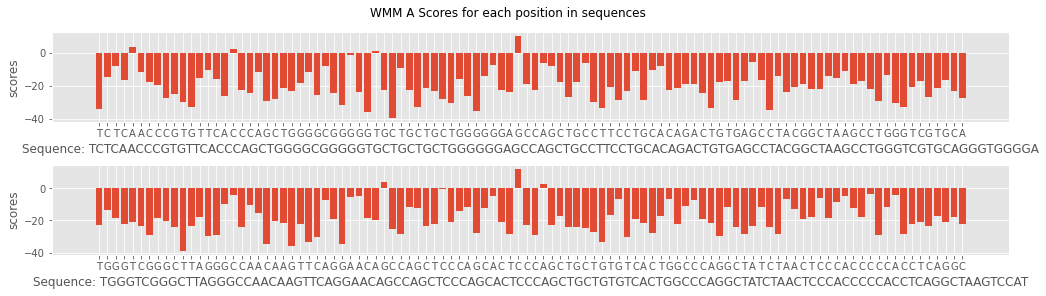

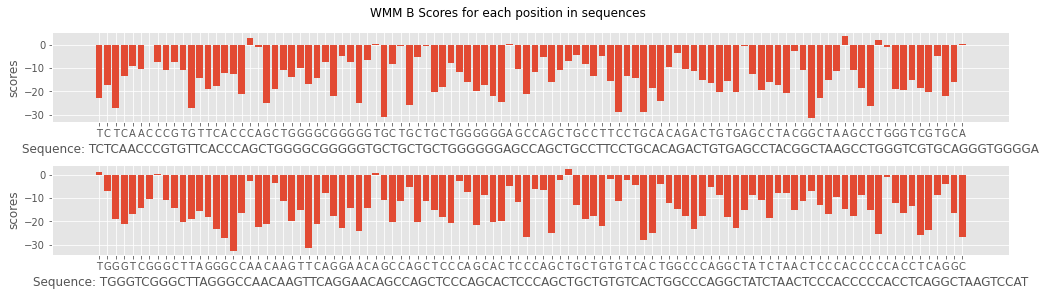

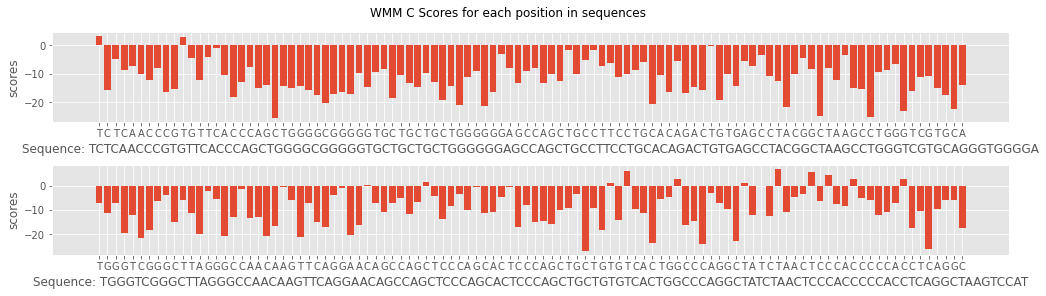

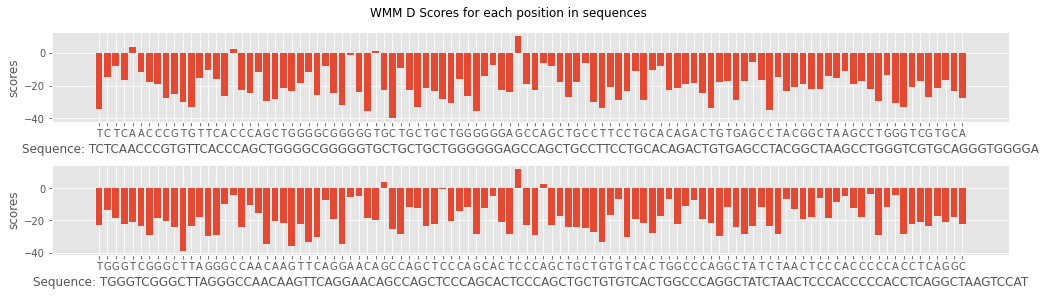

In [38]:
evals = []
for name, wmm in zip('ABCD', [A,B,C,D]):
    eval = Evaluator(wmm, test_sequences)
    eval.name = name
    evals.append(eval)
    eval.plot_results()

    # combine scores and create y_true. Calculate ROC

### Motif predicted position histogram
1. Let c(j) be the count of the number of test sequences whose highest WMM score (leftmost highest, if ties) occurred at position j . Plot this histogram. 
 
2. Additionally, calculate and print m = arg max { c(j) | 1 ≤ j ≤ 113-k+1 }. 
    1. I.e., m is the most common location of the best motif hit in each sequence; 
    1. equivalently, it is the peak in the c(j) histogram.
    1. If things are working correctly, most of the best motif hits should overlap the gold-standard location by at least k/2 positions, i.e., (51-⌊k/2⌋) ≤ m ≤ (63-⌈k/2⌉). 

gold_start, gold_end =  46 55
Gold sequence =  TCAGCTGCTTG
Most common location of the best motif hit in each sequence = 51


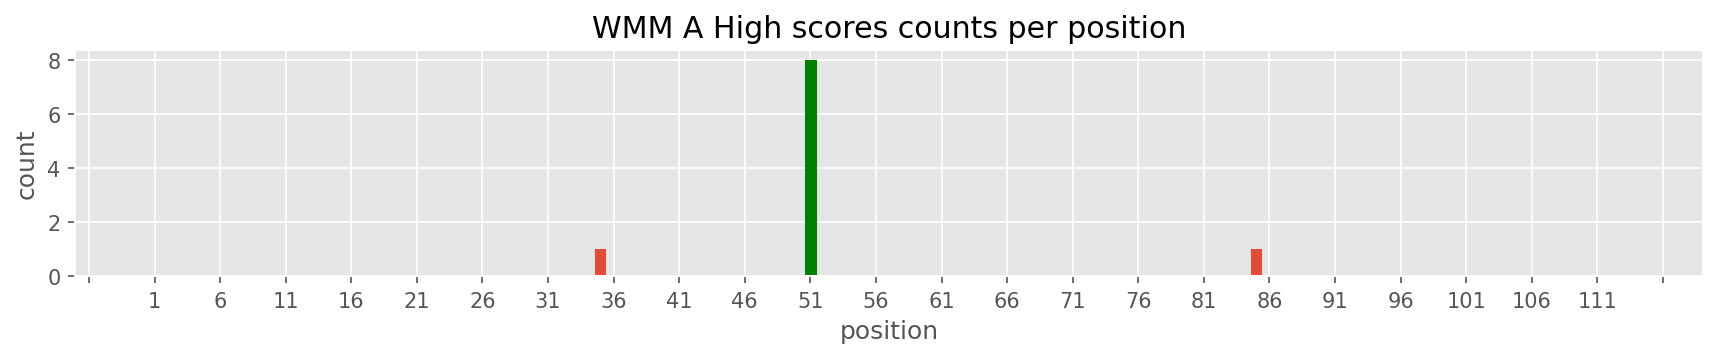

Most common location of the best motif hit in each sequence = 53


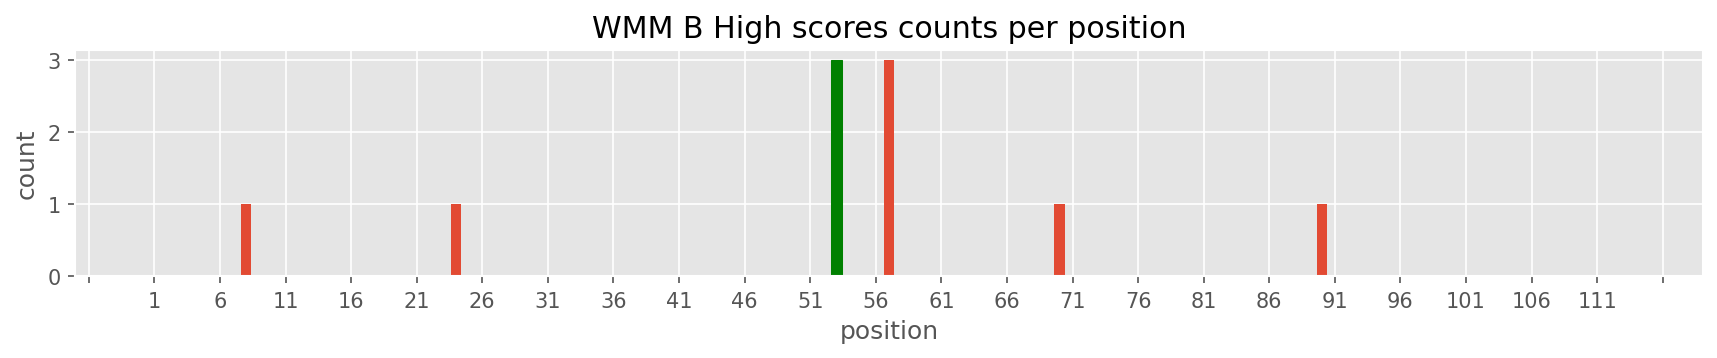

Most common location of the best motif hit in each sequence = 1


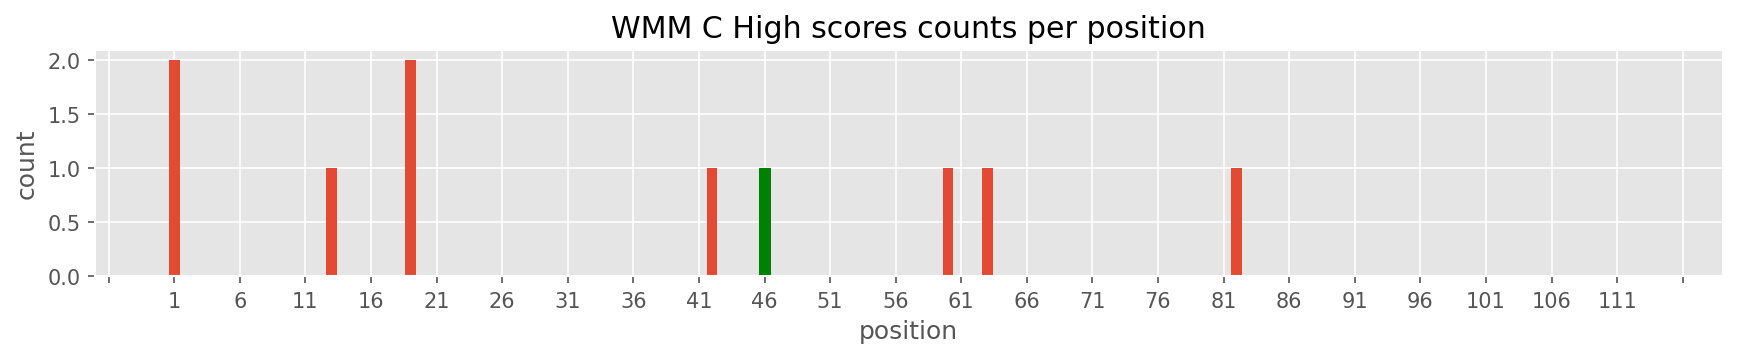

Most common location of the best motif hit in each sequence = 51


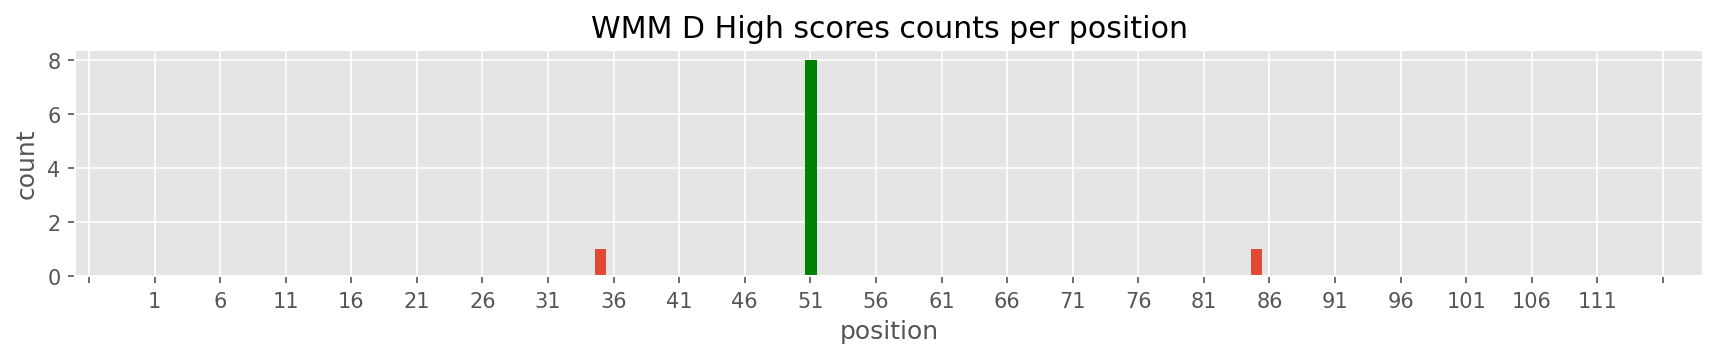

In [40]:

motif_pos = 51
gold_start, gold_end = eval.get_gold_positions(motif_pos, k)
print('gold_start, gold_end = ',gold_start, gold_end)
print('Gold sequence = ',train_sequences[0][50:51+k])
for  eval in evals:
    eval.plot_highscore_histogram(gold_start, gold_end)

# ROC

Generate an ROC plot for your motif, and calculate AUC. 

To do this for a test set containing n sequences, you will have n * (113 - k + 1) WMM scores, n of them labeled True, and the rest False. 

### ROC plot

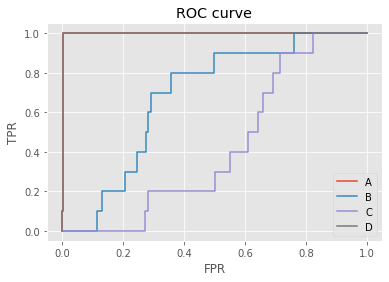

In [41]:
from assignment3.roc import ROC
import matplotlib.pyplot as plt
rocs = []

for eval in evals:
    y_score, y_true = eval.get_y(motif_pos)
    r = ROC(y_true, y_score)
    rocs.append(r)
    r.plot_roc()
plt.legend([e.name for e in evals])

### AUC

In [42]:
for eval, r in zip(evals, rocs):
    print(f'AUC for WMM {eval.name} = {r.calculateAUC():.3f}')

AUC for WMM A = 0.998
AUC for WMM B = 0.684
AUC for WMM C = 0.425
AUC for WMM D = 0.998


### Largest threshold
for WMM C, what is the largest τ recovering all True Positives, how many False Positives, True Negatives and False Negatives are found with the same τ and what are the corresponding TPR and FPR values?

C = lowest Entropy

Reload a module:

import importlib, then do importlib.reload(nameOfModule)
https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive

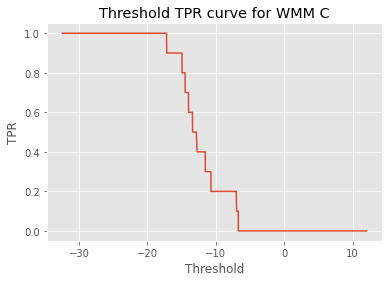

In [43]:
r = rocs[2]
plt.plot(r.thresholds,r.tprs)
plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.title('Threshold TPR curve for WMM C')
plt.show()

In [44]:
t = r.largest_thres_TPR1()
print(f'WMM C: Largest Threshold with TPR 1 for = {t:.3f}')

WMM C: Largest Threshold with TPR 1 for = -17.186


In [47]:
tpr, fpr, tp, fp, tn, fn = r.get_TPR_FPR_TP_FP_TN_FN(t)
print('WMM C : At threshold f {:.3f} , TPR = {}, FPR = {:.3f}, tp = {}, fp = {}, tn = {}, fn = {}'.format(t, tpr, fpr, tp, fp, tn, fn))

WMM C : At threshold f -17.186 , TPR = 1.0, FPR = 0.822, tp = 10, fp = 847, tn = 183, fn = 0


In [16]:
np.log2(3/6)

-1.0